In [1]:
!pip install mljar-supervised

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.8/127.8 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 845.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 5.0 MB/s eta 0:00:00
  Created wheel for mljar-supervised: filename=mljar_supervised-1.1.17-py3-none-any.whl size=164663 sha256=77005a0d85ae0a84319f

In [3]:
!pip uninstall -y numpy
!pip install numpy==1.23.5

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 35.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
bigframes 2.4.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires nump

restart runtime

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from supervised.automl import AutoML

In [175]:
df = pd.read_csv('/content/drive/MyDrive/Ewha/enhanced_student_habits_performance_dataset.csv')
df.head()

,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     80000 non-null  int64  
 1   age                            80000 non-null  int64  
 2   gender                         80000 non-null  object 
 3   major                          80000 non-null  object 
 4   study_hours_per_day            80000 non-null  float64
 5   social_media_hours             80000 non-null  float64
 6   netflix_hours                  80000 non-null  float64
 7   part_time_job                  80000 non-null  object 
 8   attendance_percentage          80000 non-null  float64
 9   sleep_hours                    80000 non-null  float64
 10  diet_quality                   80000 non-null  object 
 11  exercise_frequency             80000 non-null  int64  
 12  parental_education_level       80000 non-null 

In [177]:
print(f'The number of rows in the dataset is {df.shape[0]}')
print(f'Columns: {df.columns}')

The number of rows in the dataset is 80000
Columns: Index(['student_id', 'age', 'gender', 'major', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'previous_gpa',
       'semester', 'stress_level', 'dropout_risk', 'social_activity',
       'screen_time', 'study_environment', 'access_to_tutoring',
       'family_income_range', 'parental_support_level', 'motivation_level',
       'exam_anxiety_score', 'learning_style', 'time_management_score',
       'exam_score'],
      dtype='object')


In [178]:
print(df.isnull().sum())

student_id                       0
age                              0
gender                           0
major                            0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
previous_gpa                     0
semester                         0
stress_level                     0
dropout_risk                     0
social_activity                  0
screen_time                      0
study_environment                0
access_to_tutoring               0
family_income_range              0
parental_support_level           0
motivation_level                 0
exam_anxiety_score               0
learning_style      

In [179]:
print(f'# of duplicated instances = {df.duplicated().sum()}')

# of duplicated instances = 0


In [181]:
numeric_columns=df.select_dtypes(include=["int64","float64"]).columns.tolist()
print("numerical :",numeric_columns)


categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("categorical: ") # including nominal & ordinal
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

numerical : ['student_id', 'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'previous_gpa', 'semester', 'stress_level', 'social_activity', 'screen_time', 'parental_support_level', 'motivation_level', 'exam_anxiety_score', 'time_management_score', 'exam_score']
categorical: 
gender: ['Male' 'Other' 'Female']
major: ['Computer Science' 'Arts' 'Psychology' 'Business' 'Engineering' 'Biology']
part_time_job: ['Yes' 'No']
diet_quality: ['Poor' 'Good' 'Fair']
parental_education_level: ['Some College' 'PhD' 'High School' 'Master' 'Bachelor']
internet_quality: ['High' 'Low' 'Medium']
extracurricular_participation: ['Yes' 'No']
dropout_risk: ['No' 'Yes']
study_environment: ['Co-Learning Group' 'Library' 'Quiet Room' 'Dorm' 'Cafe']
access_to_tutoring: ['Yes' 'No']
family_income_range: ['High' 'Low' 'Medium']
learning_style: ['Reading' 'Kinesthetic' 'Visual' 'Auditory']


In [184]:
nominal_features = [
    "gender", "major", "part_time_job", "extracurricular_participation",
    "dropout_risk", "study_environment", "access_to_tutoring", "learning_style"
]

ordinal_features = {
    "diet_quality": ["Poor", "Fair", "Good"],
    "parental_education_level": ["High School", "Some College", "Bachelor", "Master", "PhD"],
    "internet_quality": ["Low", "Medium", "High"],
    "family_income_range": ["Low", "Medium", "High"]
}

from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder(categories=[
    ["Poor", "Fair", "Good"],
    ["High School", "Some College", "Bachelor", "Master", "PhD"],
    ["Low", "Medium", "High"],
    ["Low", "Medium", "High"]
])

# for categorical(ordinal) -> ordinal encoding
# for nomianl -> one-hot encoding
df[list(ordinal_features.keys())] = ordinal_enc.fit_transform(df[list(ordinal_features.keys())])
df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

In [185]:
df.head()

,student_id,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,...,extracurricular_participation_Yes,dropout_risk_Yes,study_environment_Co-Learning Group,study_environment_Dorm,study_environment_Library,study_environment_Quiet Room,access_to_tutoring_Yes,learning_style_Kinesthetic,learning_style_Reading,learning_style_Visual
0,100000,26,7.645367,3.0,0.1,70.3,6.2,0.0,3,1.0,...,True,False,True,False,False,False,True,False,True,False
1,100001,28,5.700000,0.5,0.4,88.4,7.2,2.0,4,4.0,...,False,False,True,False,False,False,True,False,True,False
2,100002,17,2.400000,4.2,0.7,82.1,9.2,2.0,4,0.0,...,True,False,False,False,True,False,True,True,False,False
3,100003,27,3.400000,4.6,2.3,79.3,4.2,1.0,3,3.0,...,True,False,True,False,False,False,True,False,True,False
4,100004,25,4.700000,0.8,2.7,62.9,6.5,2.0,6,4.0,...,False,False,False,False,False,True,True,False,True,False


In [186]:
new_df = df.copy()

# Change Boolean to int format
bool_columns = new_df.select_dtypes(include="bool").columns
new_df[bool_columns] = new_df[bool_columns].astype(int)

# scale numerical values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df[numeric_columns] = scaler.fit_transform(new_df[numeric_columns])

# Drop irrelevant columns
new_df = new_df.drop(['student_id'], axis=1)

new_df.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,...,extracurricular_participation_Yes,dropout_risk_Yes,study_environment_Co-Learning Group,study_environment_Dorm,study_environment_Library,study_environment_Quiet Room,access_to_tutoring_Yes,learning_style_Kinesthetic,learning_style_Reading,learning_style_Visual
0,1.066790,1.731919,0.344972,-1.641677,0.019161,-0.557064,0.0,-0.225430,1.0,2.0,...,1,0,1,0,0,0,1,0,1,0
1,1.600758,0.761237,-1.384614,-1.382158,1.063417,0.124429,2.0,0.210953,4.0,0.0,...,0,0,1,0,0,0,1,0,1,0
2,-1.336063,-0.885369,1.175173,-1.122639,0.699947,1.487414,2.0,0.210953,0.0,0.0,...,1,0,0,0,1,0,1,1,0,0
3,1.333774,-0.386398,1.451907,0.261462,0.538405,-1.920049,1.0,-0.225430,3.0,1.0,...,1,0,1,0,0,0,1,0,1,0
4,0.799807,0.262265,-1.177064,0.607487,-0.407773,-0.352616,2.0,1.083721,4.0,0.0,...,0,0,0,0,0,1,1,0,1,0


[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


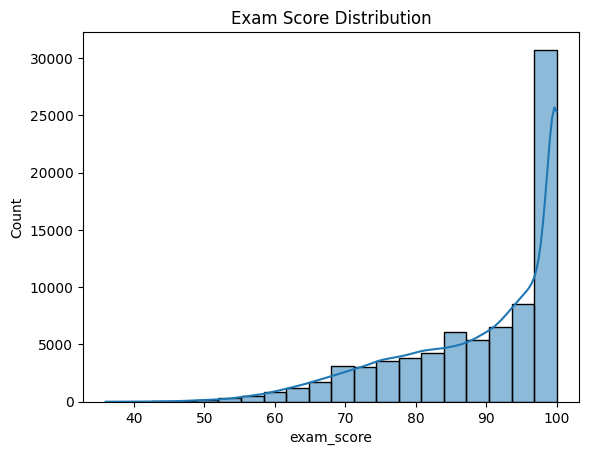

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

print(sorted(df['exam_score'].unique()))

sns.histplot(df['exam_score'], bins=20, kde=True)
plt.title("Exam Score Distribution")
plt.show()

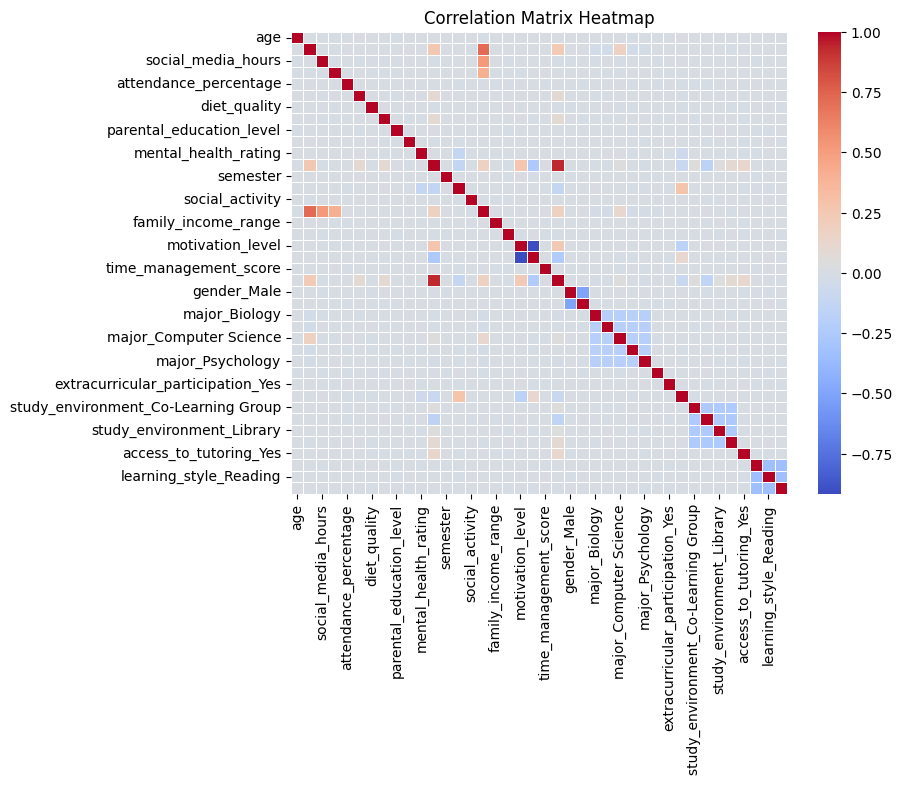

In [212]:
plt.figure(figsize=(8,6))
corr=new_df.corr()
sns.heatmap(corr,cmap="coolwarm",fmt='.2f',linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [188]:
# Split dataset
X = new_df.drop("exam_score", axis=1)
y = new_df["exam_score"]

X_train, X_test, y_train, y_test=train_test_split(X ,y, test_size=0.2, random_state=42)

In [201]:
# Function to train and evaluate AutoML with given settings
def run_automl(X_train, y_train, X_test, y_test, setting_name, automl_params):
    print(f"\nRunning AutoML with setting: {setting_name}\n")

    automl = AutoML(**automl_params)
    automl.fit(X_train, y_train)
    predictions = automl.predict(X_test)

    # compute the MSE, MAE, R2 on test data
    print("Test MSE:", mean_squared_error(y_test, predictions))
    print("Test MAE:", mean_absolute_error(y_test, predictions))
    print("Test R2:", r2_score(y_test, predictions))

    automl.report()

    leaderboard = automl.get_leaderboard()
    print(leaderboard[["model_type", "metric_value", "train_time"]])

    print("End of Evaluation")
    print("="* 40)

In [190]:
# Setting 1: AutoML with full model search (diverse models)
run_automl(
    X_train, y_train, X_test, y_test,
    "Setting 1 - Diverse Models",
  {
      'mode': 'Explain',
      'total_time_limit':15*60,
      'ml_task': 'regression',
      'eval_metric': 'mse',
      'train_ensemble' : True,
      'explain_level': 2,
  }
  )


Running AutoML with setting: Setting 1 - Diverse Models

Linear algorithm was disabled.
AutoML directory: AutoML_10
The task is regression with evaluation metric mse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline mse 1.01361 trained in 1.34 seconds
2_DecisionTree mse 0.140528 trained in 15.33 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost mse 0.126839 trained in 16.51 seconds
4_Default_NeuralNetwork mse 0.131261 trained in 6.72 seconds
5_Default_RandomForest mse 0.127823 trained in 20.16 seconds
* Step ensemble will try to check up to 1 model
Ensemble mse 0.126543 trained in 0.29 seconds
AutoML fit time: 71.23 seconds
AutoML best model: Ensemble
Test MSE: 0.12916804738275658
Test MAE: 0.27842330206929883
Test R2: 0.87

In [204]:
X_wo_gpa = new_df.drop(["exam_score", "previous_gpa"], axis=1)
y_wo_gpa = new_df["exam_score"]
X_train_2, X_test_2, y_train_2, y_test_2=train_test_split(X_wo_gpa ,y_wo_gpa, test_size=0.2, random_state=42)

In [205]:
X_wo_gpa.columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'semester', 'stress_level', 'social_activity',
       'screen_time', 'family_income_range', 'parental_support_level',
       'motivation_level', 'exam_anxiety_score', 'time_management_score',
       'gender_Male', 'gender_Other', 'major_Biology', 'major_Business',
       'major_Computer Science', 'major_Engineering', 'major_Psychology',
       'part_time_job_Yes', 'extracurricular_participation_Yes',
       'dropout_risk_Yes', 'study_environment_Co-Learning Group',
       'study_environment_Dorm', 'study_environment_Library',
       'study_environment_Quiet Room', 'access_to_tutoring_Yes',
       'learning_style_Kinesthetic', 'learning_style_Reading',
       'learning_style_Visual'],
      dtype='object')

In [206]:
# Setting 2: AutoML without previous_gpa column
run_automl(
    X_train_2, y_train_2, X_test_2, y_test_2,
    "Setting 1 - Diverse Models",
  {
      'mode': 'Explain',
      'total_time_limit':15*60,
      'ml_task': 'regression',
      'eval_metric': 'mse',
      'train_ensemble' : True,
      'explain_level': 2,
  }
  )


Running AutoML with setting: Setting 1 - Diverse Models

Linear algorithm was disabled.
AutoML directory: AutoML_14
The task is regression with evaluation metric mse
AutoML will use algorithms: ['Baseline', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 2 models
1_Baseline mse 1.01361 trained in 0.93 seconds
2_DecisionTree mse 0.897548 trained in 17.74 seconds
* Step default_algorithms will try to check up to 3 models
3_Default_Xgboost mse 0.815455 trained in 20.45 seconds
4_Default_NeuralNetwork mse 0.814497 trained in 6.99 seconds
5_Default_RandomForest mse 0.87064 trained in 22.91 seconds
* Step ensemble will try to check up to 1 model
Ensemble mse 0.808834 trained in 0.29 seconds
AutoML fit time: 83.13 seconds
AutoML best model: Ensemble
Test MSE: 0.8069799061705293
Test MAE: 0.7325059112236098
Test R2: 0.19914

In [209]:
# Top3 models from above is Xgboost, Random Forest, Neural Network, and Ensemble
# Also, add k-fold cv to enhance the performance
# Excluded 'previous_gpa' feature

# Setting 3:
run_automl(
    X_train_2, y_train_2, X_test_2, y_test_2, # without previous_gpa
    "Setting 2 - Top3 model tuning",
  {
      'algorithms':["Xgboost", 'Neural Network', 'Random Forest'],
      'mode':"Explain",
      'model_time_limit':5*60,  # 5 minutes for a model
      'explain_level':2,
      'ml_task':"regression",
      'eval_metric':"rmse",
      'train_ensemble':True,
      'validation_strategy':{
        'validation_type': 'kfold',
        'k_folds': 5,
        'random_seed': 42,
      }
  }
)



Running AutoML with setting: Setting 2 - Top3 model tuning

AutoML directory: AutoML_16
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Xgboost', 'Neural Network', 'Random Forest']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 3 models
1_Default_Xgboost rmse 0.898474 trained in 81.62 seconds
2_Default_NeuralNetwork rmse 0.89952 trained in 35.61 seconds
3_Default_RandomForest rmse 0.925824 trained in 174.9 seconds
* Step ensemble will try to check up to 1 model
Ensemble rmse 0.896278 trained in 0.28 seconds
AutoML fit time: 302.46 seconds
AutoML best model: Ensemble
Test MSE: 0.8043028145781227
Test MAE: 0.737226210720506
Test R2: 0.2017999261878164
       model_type  metric_value  train_time
0         Xgboost      0.898474       84.01
1  Neural Network      0.899520       36.95
2   

In [210]:
# Setting 4: Enhance Xgboost
run_automl(
    X_train_2, y_train_2, X_test_2, y_test_2, # without previous_gpa
    "Setting 2 - Top3 model tuning", #Typo
  {
      'algorithms':["Xgboost"],
      'mode':"Perform", # Perform mode
      'total_time_limit':10*60,  # 5 minutes for a model
      'explain_level':2,
      'ml_task':"regression",
      'eval_metric':"mae", # Modified eval metric to MAE from RMSE
      'train_ensemble':False,
      'features_selection': True,
      'hill_climbing_steps': 2 # default for `Perform`

  }
)


Running AutoML with setting: Setting 2 - Top3 model tuning

AutoML directory: AutoML_17
The task is regression with evaluation metric mae
AutoML will use algorithms: ['Xgboost']
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 1 model
1_Default_Xgboost mae 0.734783 trained in 107.13 seconds (1-sample predict time 0.0459 seconds)
* Step not_so_random will try to check up to 4 models
2_Xgboost mae 0.737435 trained in 117.04 seconds (1-sample predict time 0.046 seconds)
3_Xgboost mae 0.737684 trained in 102.11 seconds (1-sample predict time 0.0473 seconds)
4_Xgboost mae 0.735952 trained in 87.69 seconds (1-sample predict time 0.0719 seconds)
Skip golden_features because no parameters were generated.
Skip insert_random_feature because no parameters wer

In [214]:
# Setting 5: Enhance by Compete mode
run_automl(
    X_train_2, y_train_2, X_test_2, y_test_2, # without previous_gpa
    "Setting 3-2 - Top3 model tuning (2)",
  {
      'algorithms':["Neural Network", "Xgboost", "Random Forest"],
      'mode':"Compete", # Perform mode
      'total_time_limit':15*60,
      'explain_level':2,
      'ml_task':"regression",
      'eval_metric':"mae", # Modified eval metric to MAE from RMSE
      'train_ensemble':True,
      'features_selection': True,
      'golden_features': True
  }
)


Running AutoML with setting: Setting 3-2 - Top3 model tuning (2)

AutoML directory: AutoML_18
The task is regression with evaluation metric mae
AutoML will use algorithms: ['Neural Network', 'Xgboost', 'Random Forest']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree mae 0.775967 trained in 17.17 seconds
Disable stacking for split validation
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 3 models
2_Default_Xgboost mae 0.739853 trained in 14.11 seconds
3_Default_NeuralNetwork mae 0.735845 trained in 8.09 seconds
4_Default_RandomForest mae 0.764073 trained in 23.79 

#### Check env

In [219]:
import os
import pandas as pd
import seaborn as sns
import matplotlib
import sklearn
import supervised
print("pandas:", pd.__version__)
print("seaborn:", sns.__version__)
print("matplotlib:", matplotlib.__version__)
print("scikit-learn:", sklearn.__version__)
print("mljar-supervised:", supervised.__version__)

pandas: 2.2.2
seaborn: 0.13.2
matplotlib: 3.10.0
scikit-learn: 1.6.1
mljar-supervised: 1.1.17


In [221]:
import platform
import sys
import os

print("Python version:", sys.version)
print("Platform:", platform.system())
print("Platform version:", platform.version())
print("OS details:", os.uname() if hasattr(os, "uname") else "Unavailable on this system")

Python version: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
Platform: Linux
Platform version: #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
OS details: posix.uname_result(sysname='Linux', nodename='f47104238182', release='6.1.123+', version='#1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025', machine='x86_64')


In [223]:
with open("requirements.txt", "w") as f:
    f.write("""pandas==2.2.2
seaborn==0.13.2
matplotlib==3.10.0
scikit-learn==1.6.1
mljar-supervised==1.1.17
""")